# Librería




In [59]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sympy as sp
import scipy.linalg as la
from scipy.interpolate import lagrange
from scipy.interpolate import CubicHermiteSpline
import scipy.interpolate
from scipy.stats import norm
from scipy.integrate import quad
from scipy.optimize import newton, bisect, root_scalar, fixed_point
from scipy.integrate import trapezoid, simpson

# Actividad 06: Diferenciación númerica

---
### Profesor: Juan Marcos Marín
### Nombre: Soleil Dayana Niño Murcia
*Métodos computacionales 2024-II*

---

# 1.
Implementar el método de la derivada de cinco puntos a través de una función llamada `five_point_derivative`. Luego,
* Calcule el valor para $f(x) = \cos(x)$ utilizando un arreglo con 10 datos $[0\leq x\leq 2\pi]$ y evalue $f''(\pi/8)$ con $h = 0.05$.




In [60]:
def five_point_derivative(f, h=1e-5):
  g = lambda x0 : (f(x0 + 2*h) - 8*f(x0 + h) + 8*f(x0 - h) - f(x0 - 2*h)) / (12 * h)
  return g # Entrega una función equivalente a f'(x)

In [61]:
f = lambda x: np.cos(x)
xlinspace = np.linspace(0, 2*np.pi, 10)

f_eval = f(xlinspace) # Evalúa la función entre 0 y 2pi

df = five_point_derivative(f, h=0.05)
df2 = five_point_derivative(df, h=0.05)

print('El valor de f''(π/8)  con h=0.05 es',df2(np.pi/8))

El valor de f(π/8)  con h=0.05 es -0.9238791476760557


* Encuentre el error de su aproximación. ¿Mejorará con un $h$ menor o mayor?

In [62]:
x_sym = sp.Symbol('x')
f_sp = sp.cos(x_sym)
df_sp = sp.diff(f_sp, x_sym)
df_sp
valor_real = sp.diff(df_sp, x_sym).subs(x_sym, np.pi/8)
print('El valor de f''(π/8) por scipy con h=0.05 es',valor_real)
error = np.abs(df2(np.pi/8) - valor_real)
print(f"El error del cálculo empleando derivada de 5 puntos es es de {error}.")

El valor de f(π/8) por scipy con h=0.05 es -0.923879532511287
El error del cálculo empleando derivada de 5 puntos es es de 3.84835231015401E-7.


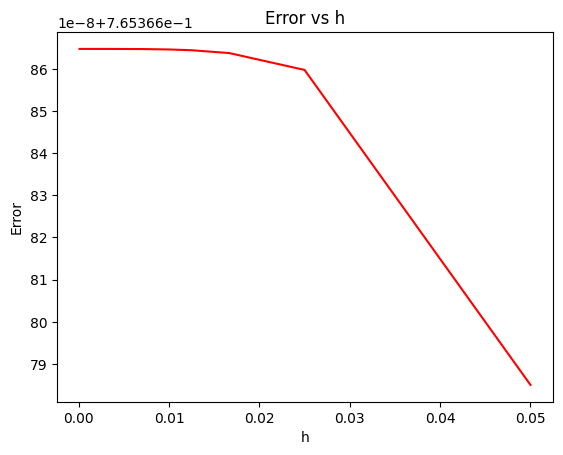

In [63]:
errores, h_val = [], []

x_sym = sp.Symbol('x')
f_sp = sp.cos(x_sym)
df_sp = sp.diff(f_sp, x_sym)
df_sp_num = df_sp.subs(x_sym, np.pi/8)

f_num = lambda x: np.cos(x)

for i in range(1,500):
  h = 0.05 / i
  df = five_point_derivative(f_num, h=h)
  error = np.abs(df(np.pi/8) - df_sp_num)
  errores.append(error)
  h_val.append(h)

errores = np.array(errores)
h_val = np.array(h_val)

plt.plot(h_val, errores, color = 'red')
plt.xlabel('h')
plt.ylabel('Error')
plt.title('Error vs h')
plt.show()

La aproximación mejora entre mayor sea el h, disminuyendo el error.

#2.
Considere la función:

$$f(x) = x e^x$$

Encuentre la derivada númerica $f'(x)$ y $f''(x)$ para $x = 2.0$ usando diferencias finitas. Considere un arreglo con 6 puntos $[1.8\leq x\leq 2.2]$.


In [79]:
def centered_diff(y, x):
    """
    Aproxima la primera derivada de f en x usando el método de diferencia central.
    y: valores de la función (Series o array)
    x: puntos en
     los que se evaluó la función (Series o array)
    return: primera derivada de f en x
    """
    x, y = np.array(x), np.array(y)
    return (y[1:] - y[:-1]) / (x[1:] - x[:-1])

In [80]:
f = lambda x: x * np.exp(x)
points = np.linspace(1.8, 2.2, 6) # Arreglo de 6 puntos [1.8≤x≤2.2]

In [81]:
df = centered_diff(f(points), points) # Primera derivada, con diferencias centradas
df_mean = df.mean()
print('Primera derivada con dif. centradas en x = 2:', df_mean.round(2))

Primera derivada con dif. centradas en x = 2: 22.41


In [82]:
df2 = centered_diff(df, points [:-1]) # Segunda derivada, con diferencias centradas
second_df = df2.mean()
print('Segunda derivada empleando diferencias centradas, evaluada en x = 2:', second_df.round(2))
# Verifiqué evaluando y son bastante aertados los valores

Segunda derivada empleando diferencias centradas, evaluada en x = 2: 29.76


*   Cambie los valores de $h$ desde 0.01 hasta 0.1 (tomando 10 diferentes) y compare su resultado con el dado por `scipy` y `numpy.gradient`

In [83]:
# Segunda derivada empleando scipy
x  = sp.Symbol('x')
f = x * sp.exp(x)
sp_diff =   sp.diff(f)
sp_diff2 = sp.diff(sp_diff)
sp_diff2eval = sp_diff2.subs(x, 2) # f"(2) por scipy
sp_diff2eval # Valor comprobado, está correcto

4*exp(2)

In [84]:
f = lambda x: x * np.exp(x)
x = np.linspace(1.8, 2.2, 6)
df_gr = np.gradient(f(x), x)  # Primera derivada
df_gr_mean = df_gr.mean()
print('Primera derivada método Gradient (x=2): ', df_gr_mean.round(2))
df2_gradient = np.gradient(df_gr, x) # Segunda derivada

df2_gradient_mean = df2_gradient.mean()
print('2da derivada método Gradient (x=2): ', df2_gradient_mean.round(2))

Primera derivada método Gradient (x=2):  22.45
2da derivada método Gradient (x=2):  22.33


*   ¿Cuál será el valor óptimo de $h$?

In [85]:
# Una función equivalente a la que ya comprobamos, pero que emplee un h es:
def h_centered_diff(f, x, h):
    return (f(x + h) - f(x - h)) / (2 * h)

h_values = np.linspace(0.01, 0.1, 10)
optimal_h = None
min_error = float('inf')

x_sym = sp.Symbol('x')
f_sp = x_sym * sp.exp(x_sym)
df_sp = sp.diff(f_sp)
df_sp_num = df_sp.subs(x_sym, 2)

f_num = lambda x: x * np.exp(x)

for h in h_values:
  df_approx = h_centered_diff(f_num, 2, h)
  error = np.abs(df_approx - df_sp_num)
  if error < min_error:
    min_error = error
    optimal_h = h

print("El valor óptimo de h es:", optimal_h)
print("Error mínimo:", min_error)
#Dentro de nuestro arreglo para h, el valor más óptimo será el menor h, pues toma saltos más pequeños y reduce el error

El valor óptimo de h es: 0.01
Error mínimo: 22.1677840557769 - 3*exp(2)


#3.
Compare la primera derivada del punto 2 usando los métodos de diferencias finitas, derivada de tres y cinco puntos para el $h$ con el menor error encontrado en el punto anterior. Encuentre los errores.

In [89]:
# Derivada por tres y cinco puntos
f = lambda x: x * np.exp(x)
df_tres_puntos =  (f(2+h) - f(2-h))/(2*h)
df_cinco_puntos = -five_point_derivative(f, h=0.01)(2) #empleando el menor h
df_cinco_puntos

22.16716827955015

In [96]:
print('Primera derivada ya evaluada en x=2 por: \nDiferencias finitas: ', df_mean.round(2))
print('Tres puntos: ', df_tres_puntos.round(2))
print('Cinco puntos: ',df_cinco_puntos.round(2))

Primera derivada ya evaluada en x=2 por: 
Diferencias finitas:  22.41
Tres puntos:  22.23
Cinco puntos:  22.17


In [105]:
error_df_finitas = np.abs(df_mean - df_sp_num)
error_df_finitas

22.4141606570294 - 3*exp(2)

In [106]:
error_df_tres = np.abs(df_tres_puntos - df_sp_num)
error_df_tres

22.2287868803073 - 3*exp(2)

In [107]:
error_df_cinco = np.abs(df_cinco_puntos - df_sp_num)
error_df_cinco

-22.1671682795502 + 3*exp(2)